In [181]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import prettytable
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [182]:
boston=load_boston()
#boston is dictionary having data, target, feature_names, DESCR as the keys

In [183]:
#now let's seperate the x and y.

X=boston.get('data')
Y=boston.get('target')

In [184]:
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)

df=pd.DataFrame(data=X, columns=boston.get('feature_names'))
df['Result']=Y

In [185]:
x=df.drop(['Result'], axis=1)

In [186]:
y=df[['Result']]

In [187]:
w=[0 for i in range(X.shape[1])]
b=0
r=0.001
for e in range(100000):
    err_lst=[]
    for i in range(X.shape[0]):
        yhat=X[i].dot(w)+b
        error=Y[i]-yhat
        err_lst.append(error)
        #print(type(error))
        #print(i)
    w=w-(-2/X.shape[0])*r*(np.transpose(X).dot(err_lst))
    b=b-((-2/X.shape[0])*r*(np.sum(err_lst)))
print(w)
print(b)

[-0.92814559  1.0815678   0.14089742  0.68174009 -2.05671782  2.67423063
  0.01946568 -3.10404445  2.66221113 -2.07677428 -2.06060642  0.84926837
 -3.74362688]
22.5328063241


In [188]:
#calculate MSE

pred_y = w.T.dot(X.T) + b

MSE_SGD=np.sum((Y-pred_y)**2)/len(Y)

MSE_SGD

21.894831181735917

## Plotting Garph

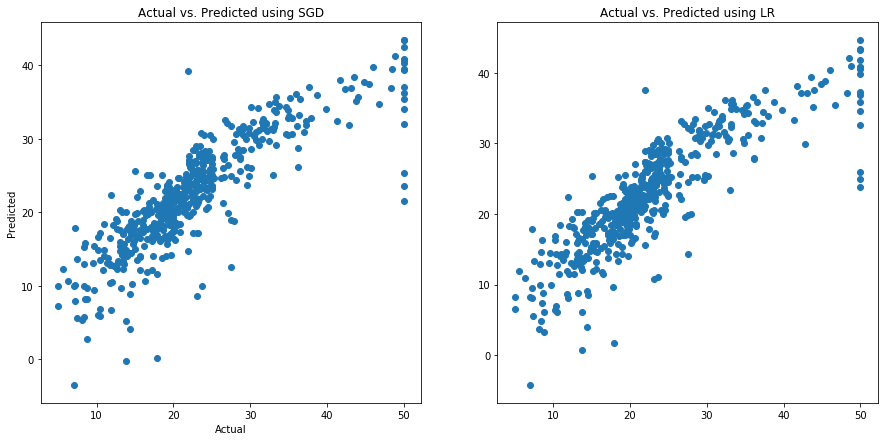

In [189]:
model=SGDRegressor()
model.fit(X,Y)
pred_sgd_y=model.predict(X)

fig = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(Y, pred_sgd_y);
plt.title('Actual vs. Predicted using SGD')
plt.xlabel('Actual')
plt.ylabel('Predicted')


plt.subplot(1,2,2)
model2=LinearRegression()
model2.fit(X, Y)
pred_Lr_y=model2.predict(X)
plt.scatter(Y, pred_Lr_y)
plt.title('Actual vs. Predicted using LR')

plt.show()

## Comparing Weights

In [190]:
cof_sgd=model.coef_
cof_lr=model2.coef_
column=boston.get('feature_names')

print('Weights using SGD and sklearn LR')
pd.DataFrame({'Feature_names':list(column), 'Weights_SGD_Sklrn':list(cof_sgd), 'Weights_LR':list(cof_lr)[0], 'Weights_SGD_own':w})


Weights using SGD and sklearn LR


,Feature_names,Weights_SGD_Sklrn,Weights_LR,Weights_SGD_own
0,CRIM,-0.608261,-0.928146,-0.928146
1,ZN,0.665371,-0.928146,1.081568
2,INDUS,-0.484600,-0.928146,0.140897
3,CHAS,0.829025,-0.928146,0.681740
4,NOX,-0.678141,-0.928146,-2.056718
5,RM,3.047265,-0.928146,2.674231
6,AGE,0.054363,-0.928146,0.019466
7,DIS,-1.995879,-0.928146,-3.104044
8,RAD,0.936348,-0.928146,2.662211
9,TAX,-0.634868,-0.928146,-2.076774


## Comparing MSE

In [191]:
MSE_SGD=mean_squared_error(pred_sgd_y, Y)
MSE_Lr=mean_squared_error(pred_Lr_y, Y)

pd.DataFrame({'MSE_SGD_Sklr':MSE_SGD, 'MSE_LR':MSE_Lr, 'MSE_SGD_own':MSE_SGD}, index=['>>'])

,MSE_SGD_Sklr,MSE_LR,MSE_SGD_own
>>,22.92154,21.894831,22.92154
